# Session 3 — Sentence-Level Analysis
## Measure 1: Sentence Length & Distribution
This notebook helps you split your text into sentences and compute:
- number of sentences
- average sentence length (in tokens and in characters)
- distribution / histogram of sentence lengths
- comparison across two texts/authors

Like before, we'll analyze Lewis Carroll's two Alice books as our example texts:
- Alice's Adventures in Wonderland
- Through the Looking-Glass

In [10]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# --- Cell 1: Load Data ---

# Load the books from Project Gutenberg
def load_book(filepath):
    """Load and clean book text from Project Gutenberg"""
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # Remove Project Gutenberg headers/footers
    # Find start of actual content
    # !!! You may need to change 'CHAPTER I' to something else,
    # like "BOOK ONE" or "PART 1", depending on your text files.
    if 'CHAPTER I' in text:
        start = text.find('CHAPTER I')
        text = text[start:]
    elif '*** START OF' in text:
        start = text.find('*** START OF')
        text = text[start + 100:]  # Skip the marker line
    
    # Remove end markers
    if '*** END OF' in text:
        end = text.find('*** END OF')
        text = text[:end]
    elif 'End of Project Gutenberg' in text:
        end = text.find('End of Project Gutenberg')
        text = text[:end]
    
    return text.strip()

# Load both Tolstoy books using the full filenames from your screenshot
anna_karenina_text = load_book('../data/The Project Gutenberg eBook of Anna Karenina, by Leo Tolstoy.txt')
war_and_peace_text = load_book('../data/The Project Gutenberg eBook of War and Peace, by Leo Tolstoy.txt')

print(f"Anna Karenina: {len(anna_karenina_text):,} characters")
print(f"War and Peace: {len(war_and_peace_text):,} characters")

Anna Karenina: 1,963,419 characters
War and Peace: 3,203,378 characters


In [11]:
def analyze_sentences(text, book_name):
    """Split text into sentences and analyze lengths"""
    # Split on sentence boundaries
    sentences = re.split(r'[.!?]+\s+', text.strip())
    sentences = [s.strip() for s in sentences if s.strip() and len(s.split()) > 2]
    
    lengths_tokens = [len(s.split()) for s in sentences]
    lengths_chars = [len(s) for s in sentences]
    
    print(f"\n{'='*70}")
    print(f"{book_name}")
    print(f"{'='*70}")
    print(f"Number of sentences: {len(sentences):,}")
    print(f"Avg sentence length (tokens): {sum(lengths_tokens)/len(lengths_tokens):.2f}")
    print(f"Avg sentence length (chars): {sum(lengths_chars)/len(lengths_chars):.2f}")
    print(f"Min sentence length (tokens): {min(lengths_tokens)}")
    print(f"Max sentence length (tokens): {max(lengths_tokens)}")
    
    return sentences, lengths_tokens, lengths_chars

# Analyze both books
anna_karenina_sents, anna_karenina_tokens, anna_karenina_chars = analyze_sentences(anna_karenina_text, "Anna Karenina")
war_and_peace_sents, war_and_peace_tokens, war_and_peace_chars = analyze_sentences(war_and_peace_text, "War and Peace")


Anna Karenina
Number of sentences: 16,669
Avg sentence length (tokens): 20.93
Avg sentence length (chars): 115.17
Min sentence length (tokens): 3
Max sentence length (tokens): 205

War and Peace
Number of sentences: 26,178
Avg sentence length (tokens): 21.46
Avg sentence length (chars): 119.59
Min sentence length (tokens): 3
Max sentence length (tokens): 808


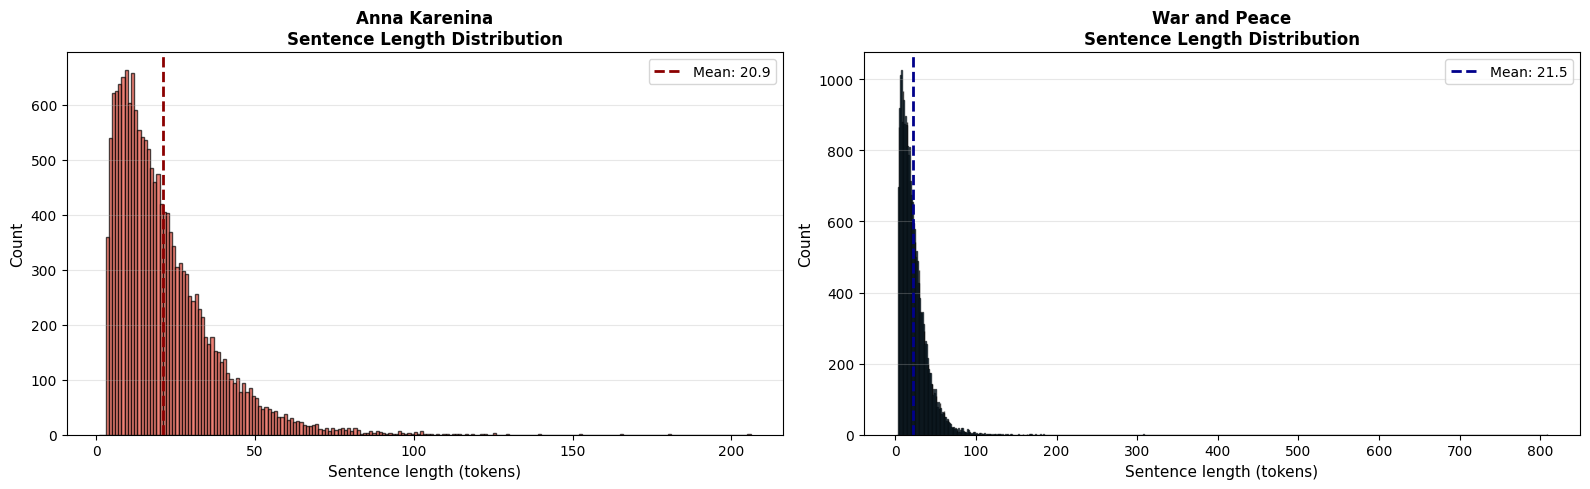

In [12]:
# Visualize sentence length distributions for both books
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Anna Karenina
ax1 = axes[0]
max_len_ak = max(anna_karenina_tokens) + 2
ax1.hist(anna_karenina_tokens, bins=range(1, max_len_ak), alpha=0.7, color='#e74c3c', edgecolor='black')
ax1.set_xlabel('Sentence length (tokens)', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_title("Anna Karenina\nSentence Length Distribution", fontsize=12, fontweight='bold')
ax1.axvline(sum(anna_karenina_tokens)/len(anna_karenina_tokens), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {sum(anna_karenina_tokens)/len(anna_karenina_tokens):.1f}')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
# Optional: Set x-limit for better readability if the tail is too long
# ax1.set_xlim(0, 200)

# War and Peace
ax2 = axes[1]
max_len_wp = max(war_and_peace_tokens) + 2
ax2.hist(war_and_peace_tokens, bins=range(1, max_len_wp), alpha=0.7, color='#3498db', edgecolor='black')
ax2.set_xlabel('Sentence length (tokens)', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_title('War and Peace\nSentence Length Distribution', fontsize=12, fontweight='bold')
ax2.axvline(sum(war_and_peace_tokens)/len(war_and_peace_tokens), color='darkblue', linestyle='--', linewidth=2, label=f'Mean: {sum(war_and_peace_tokens)/len(war_and_peace_tokens):.1f}')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
# Optional: Set x-limit for better readability
# ax2.set_xlim(0, 200)

plt.tight_layout()
plt.show()

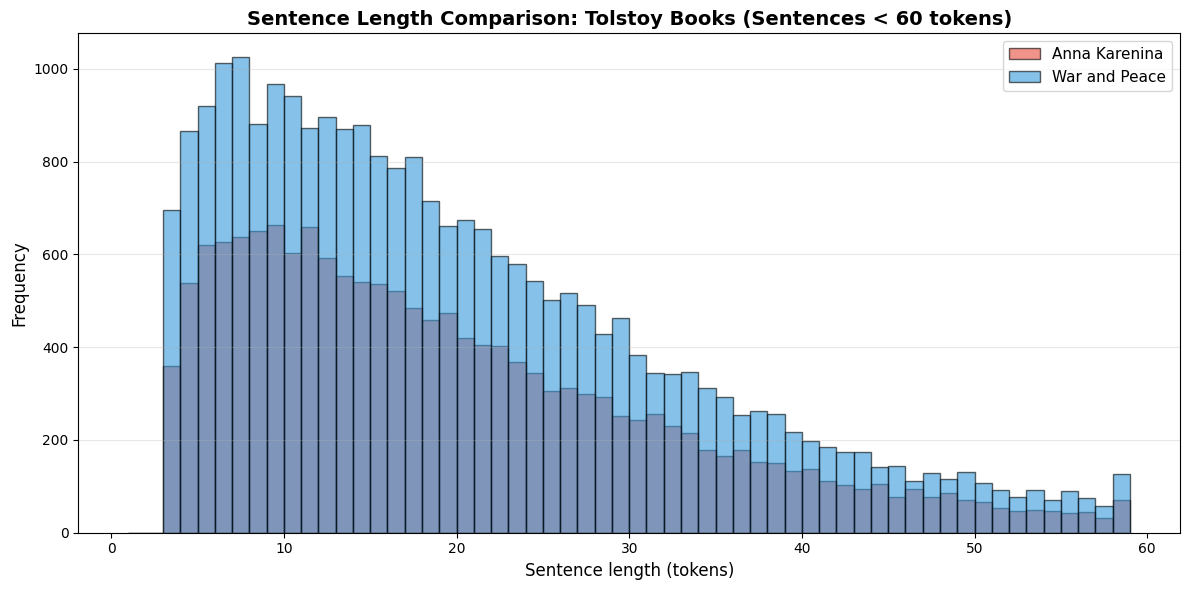


COMPARATIVE STATISTICS
Metric                           Anna Karenina   War and Peace
----------------------------------------------------------------------
Mean sentence length                     20.93           21.46
Median sentence length                      17              17
Shortest sentence                            3               3
Longest sentence                           205             808


In [13]:
# Compare both books side by side
fig, ax = plt.subplots(figsize=(12, 6))

# Note: bins are set to range(1, 60) for a focused comparison
ax.hist(anna_karenina_tokens, bins=range(1, 60), alpha=0.6, color='#e74c3c', label='Anna Karenina', edgecolor='black')
ax.hist(war_and_peace_tokens, bins=range(1, 60), alpha=0.6, color='#3498db', label='War and Peace', edgecolor='black')
ax.set_xlabel('Sentence length (tokens)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Sentence Length Comparison: Tolstoy Books (Sentences < 60 tokens)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n" + "="*70)
print("COMPARATIVE STATISTICS")
print("="*70)
print(f"{'Metric':<30} {'Anna Karenina':>15} {'War and Peace':>15}")
print("-"*70)
print(f"{'Mean sentence length':<30} {sum(anna_karenina_tokens)/len(anna_karenina_tokens):>15.2f} {sum(war_and_peace_tokens)/len(war_and_peace_tokens):>15.2f}")
print(f"{'Median sentence length':<30} {sorted(anna_karenina_tokens)[len(anna_karenina_tokens)//2]:>15} {sorted(war_and_peace_tokens)[len(war_and_peace_tokens)//2]:>15}")
print(f"{'Shortest sentence':<30} {min(anna_karenina_tokens):>15} {min(war_and_peace_tokens):>15}")
print(f"{'Longest sentence':<30} {max(anna_karenina_tokens):>15} {max(war_and_peace_tokens):>15}")